# 14-day cumulative number of COVID-19 cases per 100 000

At the end of the page, we provide a detailed description of how the numbers are calculated.

### Compute data

In [1]:
import datetime as dt
import pandas as pd
pd.set_option("max_rows", None)
from oscovida import get_incidence_rates_countries

## Table for all countries

In [2]:
cases_incidence, deaths_incidence = get_incidence_rates_countries()

Downloaded data: last data point 1/31/22 from https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv
Downloaded data: last data point 1/31/22 from https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv


In [3]:
cases_incidence

,14-day-sum,population,14-day-incidence-rate
Country,,,
Afghanistan,4100,38928341,10.5
Albania,24889,2877800,864.9
Algeria,25368,43851043,57.9
Andorra,6070,77265,7856.1
Angola,4142,32866268,12.6
Antigua and Barbuda,1306,97928,1333.6
Argentina,1181333,45195777,2613.8
Armenia,20010,2963234,675.3
Australia,710024,25459700,2788.8


## Table sorted by 14-day-incidence

In [4]:
cases_incidence.sort_values(by=['14-day-incidence-rate'], ascending=False)

,14-day-sum,population,14-day-incidence-rate
Country,,,
Israel,1108439,8655541,12806.1
Denmark,594306,5837213,10181.3
Palau,1514,18008,8407.4
Slovenia,172496,2078932,8297.3
Andorra,6070,77265,7856.1
France,4880318,65249843,7479.4
Portugal,732911,10196707,7187.7
San Marino,2243,33938,6609.1
Maldives,33879,540542,6267.6


## Tutorial: Detailed calculation for one country

In [5]:
from oscovida import fetch_cases, get_population
import datetime

In [6]:
period = 14 # Days we compute the incidence rate over

In [7]:
cases = fetch_cases() # Get a DataFrame where each row is the country, and columns cumulative case numbers
cases = cases.groupby(cases.index).sum() # Merge the rows for different regions as we want the numbers for an entire country

In [8]:
cases_germany = cases.loc['Germany'][2:] # First 2 entries are lat/lon so we only take the subsequent ones
cases_germany.tail()

1/27/22     9477603.0
1/28/22     9661657.0
1/29/22     9774847.0
1/30/22     9846032.0
1/31/22    10025463.0
Name: Germany, dtype: float64

In [9]:
yesterday = datetime.datetime.now() - datetime.timedelta(days=1)
x_days_ago = yesterday - datetime.timedelta(days=period)

In [10]:
period_mask = (
    (yesterday > pd.to_datetime(cases_germany.index)) &
    (pd.to_datetime(cases_germany.index) > x_days_ago)
) # Mask for dates between today and x days ago

In [11]:
cases_in_period_per_day_germany = cases_germany[period_mask].diff() # Apply the period mask and get the diff to get the daily new cases
cases_in_period_per_day_germany

1/18/22         NaN
1/19/22    139000.0
1/20/22    140870.0
1/21/22    133329.0
1/22/22     81343.0
1/23/22     56226.0
1/24/22    136473.0
1/25/22    179169.0
1/26/22    228608.0
1/27/22    160323.0
1/28/22    184054.0
1/29/22    113190.0
1/30/22     71185.0
1/31/22    179431.0
Name: Germany, dtype: float64

<AxesSubplot:>

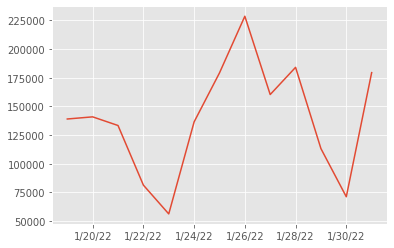

In [12]:
cases_in_period_per_day_germany.plot() # We can easily look at new cases per day

In [13]:
population = get_population().population

In [14]:
population_germany = population.loc['Germany'] # Get the population of Germany
population_germany

83155031.0

In [15]:
incidence_rate_germany = cases_in_period_per_day_germany.sum() / population_germany * 100_000
incidence_rate_germany # By convention this is total cases over period / population * 100_000

2168.4809425421295